# K-Means 클러스터링

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=20, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2, random_state=123)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

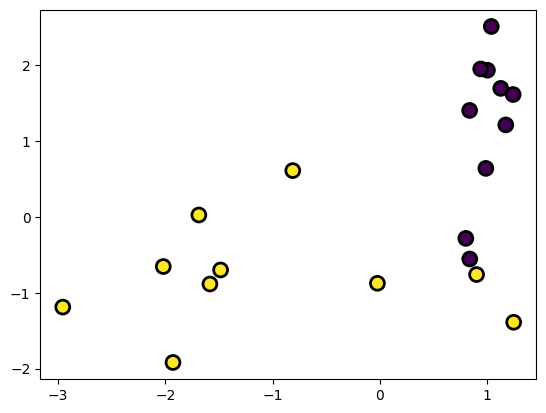

In [4]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100,
            edgecolors='k', linewidths=2)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=2, init="random", n_init=10, random_state=1)

In [7]:
model.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",2
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",1
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [8]:
model.cluster_centers_

array([[-1.56258716, -0.69768199],
       [ 1.01138251,  0.83200493]])

In [9]:
pred = model.predict(X)
pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int32)

In [10]:
c0, c1 = model.cluster_centers_

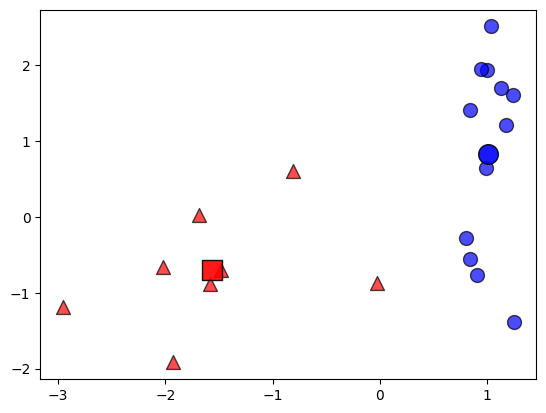

In [11]:
plt.scatter(x=X[model.labels_==0, 0], y=X[model.labels_==0, 1],
            s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
plt.scatter(x=X[model.labels_==1, 0], y=X[model.labels_==1, 1],
            s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
plt.scatter(x=c0[0], y=c0[1], s=200, 
            c='r', marker='s', edgecolor='k', alpha=0.9)
plt.scatter(x=c1[0], y=c1[1], 
            s=200, c='b', marker='o', edgecolor='k', alpha=0.9)
plt.show()

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.DataFrame(data=np.c_[X,
                             np.linalg.norm(X-c0, axis=1),
                             np.linalg.norm(X-c1, axis=1),
                             model.labels_],
                  columns=['X0', 'X1', 'd0', 'd1', 'class'])


In [14]:
df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,4.131178,1.679969,1.0
1,1.002714,1.935215,3.675992,1.103245,1.0
2,-1.688105,0.025994,0.734481,2.817248,0.0
3,0.901344,-0.758966,2.464693,1.594771,1.0
4,0.836531,1.404882,3.190070,0.598967,1.0


# 회차별 군집 확인하기

In [15]:
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
                s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
    plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
                s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
    plt.scatter(x=c0[0], y=c0[1], s=200, 
                c='r', marker='s', edgecolor='k', alpha=0.9)
    plt.scatter(x=c1[0], y=c1[1], 
                s=200, c='b', marker='o', edgecolor='k', alpha=0.9)

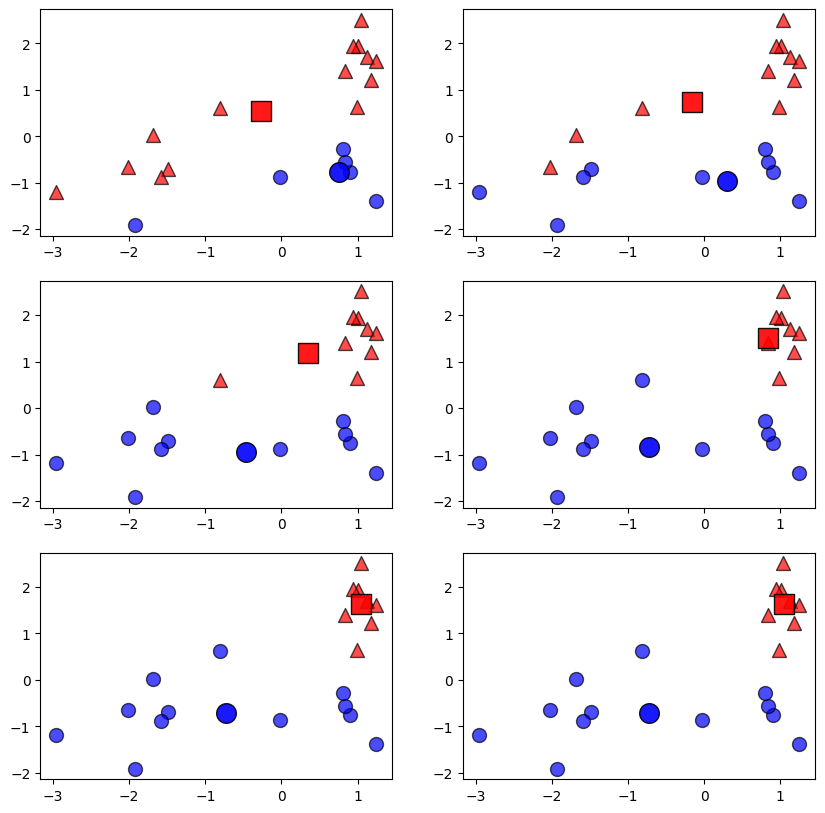

In [16]:
plt.figure(figsize=(10,10))
model1 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=1, random_state=1)
model1.fit(X)
plt.subplot(3,2,1)
plot_cluster(model1, X)

model2 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=2, random_state=1)
model2.fit(X)
plt.subplot(3,2,2)
plot_cluster(model2, X)

model3 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=3, random_state=1)
model3.fit(X)
plt.subplot(3,2,3)
plot_cluster(model3, X)

model4 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=4, random_state=1)
model4.fit(X)
plt.subplot(3,2,4)
plot_cluster(model4, X)

model5 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=5, random_state=1)
model5.fit(X)
plt.subplot(3,2,5)
plot_cluster(model5, X)

model6 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=6, random_state=1)
model6.fit(X)
plt.subplot(3,2,6)
plot_cluster(model6, X)
plt.show()

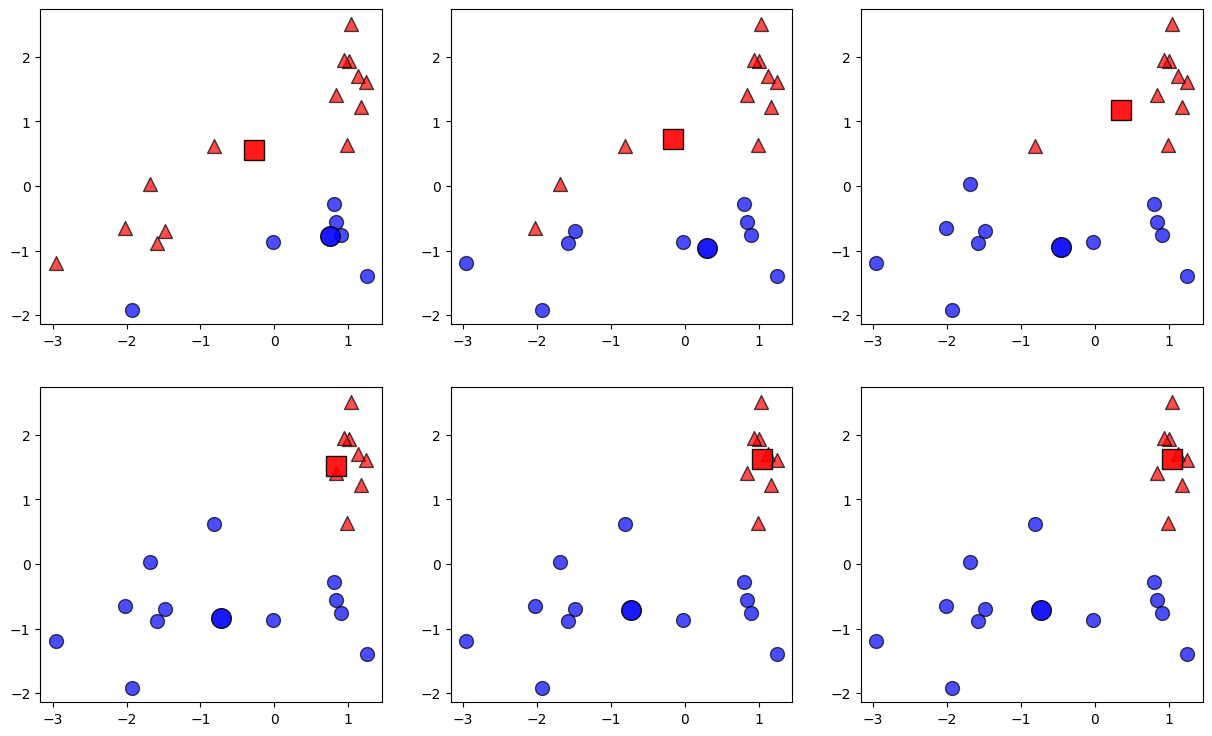

In [17]:
plt.figure(figsize=(15, 9))
for i in range(6):
    model = KMeans(n_clusters=2, init="random",
                   n_init=1, max_iter=(i+1),
                   random_state=1)
    model.fit(X)
    plt.subplot(2,3,(i+1))
    plot_cluster(model, X)

In [18]:
model = KMeans(n_clusters=2, init="random", max_iter=3, n_init=5, 
               random_state=1, verbose=1)

In [19]:
model.fit(X)

Initialization complete
Iteration 0, inertia 67.35971194894945.
Iteration 1, inertia 59.525669834479515.
Iteration 2, inertia 55.08988123033851.
Initialization complete
Iteration 0, inertia 63.12175687720361.
Iteration 1, inertia 29.670922798472713.
Iteration 2, inertia 29.1746276915693.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 45.77275674201252.
Iteration 1, inertia 28.663132733375043.
Iteration 2, inertia 27.341546526436947.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 96.47330217195297.
Iteration 1, inertia 54.69903598508019.
Iteration 2, inertia 32.08462300914662.
Initialization complete
Iteration 0, inertia 47.839972581888894.
Iteration 1, inertia 28.086599764263045.
Converged at iteration 1: strict convergence.


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",2
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",5
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",3
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",1
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",1
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [20]:
model.score(X)

-27.341546526436947

In [21]:
pred = model.predict(X)

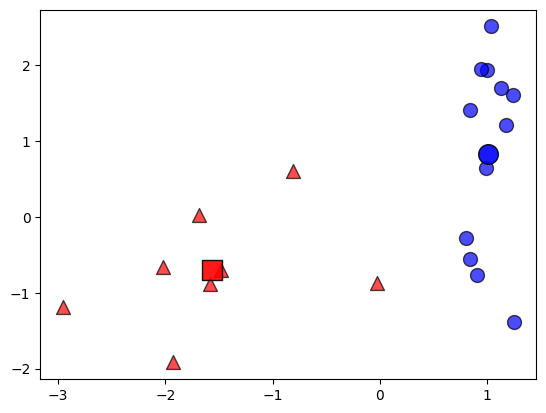

In [22]:
c0, c1 = model.cluster_centers_
plt.scatter(x=X[model.labels_==0, 0], y=X[model.labels_==0, 1],
            s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
plt.scatter(x=X[model.labels_==1, 0], y=X[model.labels_==1, 1],
            s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
plt.scatter(x=c0[0], y=c0[1], s=200, 
            c='r', marker='s', edgecolor='k', alpha=0.9)
plt.scatter(x=c1[0], y=c1[1], 
            s=200, c='b', marker='o', edgecolor='k', alpha=0.9)
plt.show()

# iris 데이터 군집분석하기

In [23]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, n_init=10, random_state=1)
iris_cluster_model.fit(iris_X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",1
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [25]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [26]:
import numpy as np
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

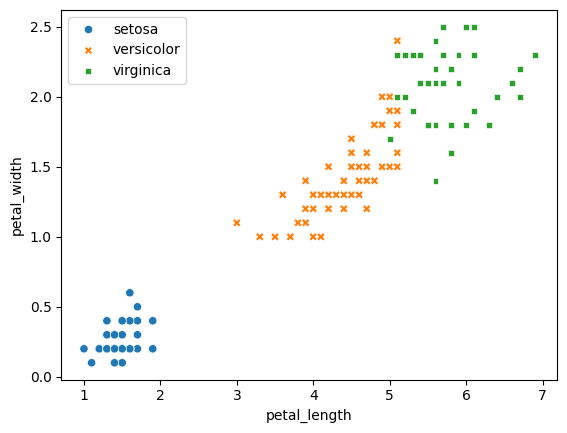

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
pred_str = le.inverse_transform(pred)

ax = sns.scatterplot(x="petal_length", y="petal_width", hue=pred_str,
                     style=pred_str, data=iris)

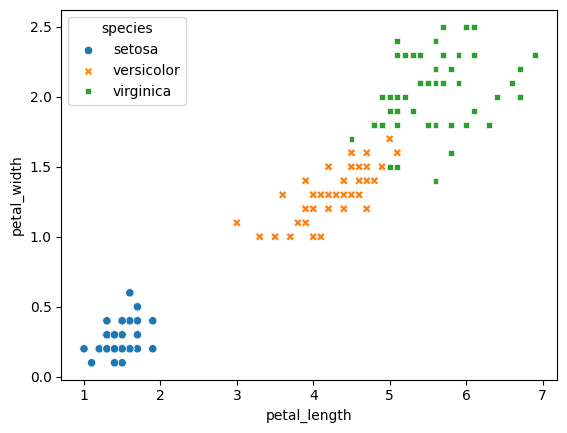

In [28]:
ax = sns.scatterplot(x="petal_length", y="petal_width",
                     hue="species", style="species", data=iris)

# K-Means 클러스터링의 한계와 극복

In [29]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

## 크기가 다를 경우

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
np.random.seed(0)
group0 = np.random.normal(-10, 2, (10,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

In [32]:
group1 = np.random.normal(10, 2, (10, 2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

In [33]:
group2 = np.random.normal(0, 5, (100, 2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

In [34]:
data = np.r_[group0, group1, group2]

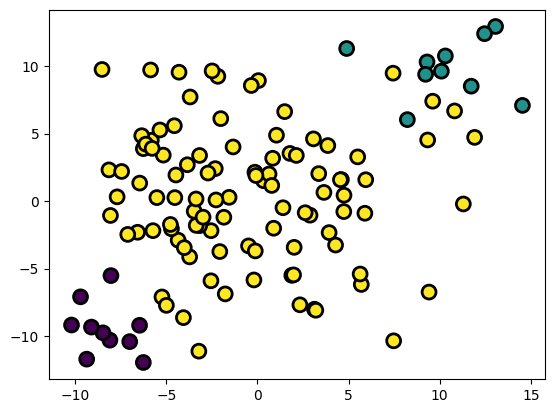

In [35]:
plt.scatter(x=data[:,0], y=data[:,1],
            marker='o', c=data[:,2].astype(int),
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [36]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random", n_init=10)
model.fit(data[:, 0:2])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [37]:
model.cluster_centers_

array([[-3.13489417,  3.70267232],
       [ 7.98532306,  5.08814034],
       [-2.4365573 , -5.47610309]])

In [38]:
pred = model.predict(data[:, 0:2])
print(pred)

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 1 2
 2 2 0 0 2 1 1 0 0 0 0 0 0 1 0 0 2 1 1 0 0 1 1 2 0 0 0 1 0 0 0 2 2 0 0 1 0
 2 0 2 2 2 2 0 1 0 2 1 1 2 0 2 0 2 2 2 0 0 0 2 2 1 1 2 1 2 2 0 1 2 2 0 1 2
 0 0 0 2 2 0 0 2 0]


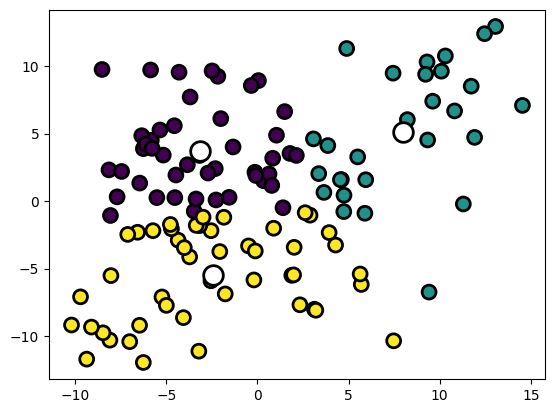

In [39]:
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred,
            s=100, edgecolor='k', linewidth=2)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='w',
            edgecolor='k', linewidth=2)
plt.show()

In [40]:
model = KMeans(n_clusters=6, init="random", n_init=10)
model.fit(data[:, 0:2])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",6
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [41]:
centers = model.cluster_centers_
colors = ['r','g','b','c','m','k']
markers = ['o','s','v','^','.','<']

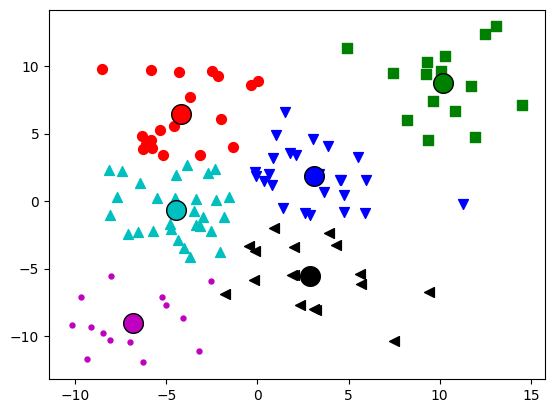

In [42]:
for i,c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i,0],
                y=data[model.labels_==i,1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i],
                edgecolor='k')
plt.show()

## 밀도가 다를 경우

In [43]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [44]:
group0 = np.random.normal(13, 0.5, (50,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

In [45]:
group1 = np.random.normal(10, 1.5, (50,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

In [46]:
group2 = np.random.normal(0, 5, (50,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

In [47]:
data = np.r_[group0, group1, group2]

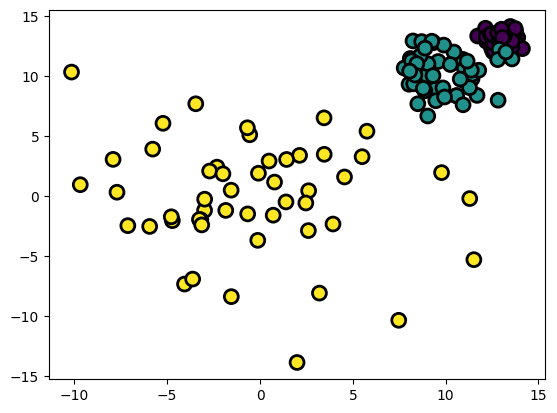

In [48]:
import matplotlib.pyplot as plt
plt.scatter(x=data[:,0], y=data[:,1],
            marker='o', c=data[:,2].astype(int), 
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [49]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random", n_init=10)
model.fit(data[:, 0:2])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [50]:
pred = model.predict(data[:,0:2])
print(pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1 0 1 1 0 2 1
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 2 1 1 0 0 0 0 0 0 1 1 0
 0 0]


In [51]:
centers = model.cluster_centers_
colors = ['r','g','b','c','m','k']
markers = ['o','s','v','^','.','<']

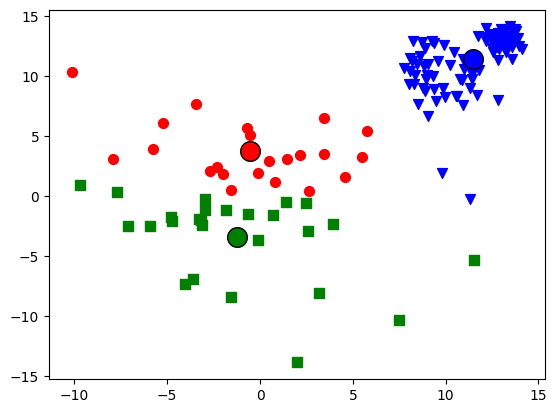

In [52]:
for i,c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i,0],
                y=data[model.labels_==i,1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i],
                edgecolor='k')

plt.show()

In [53]:
model = KMeans(n_clusters=5, init="random", n_init=10)
model.fit(data[:,0:2])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


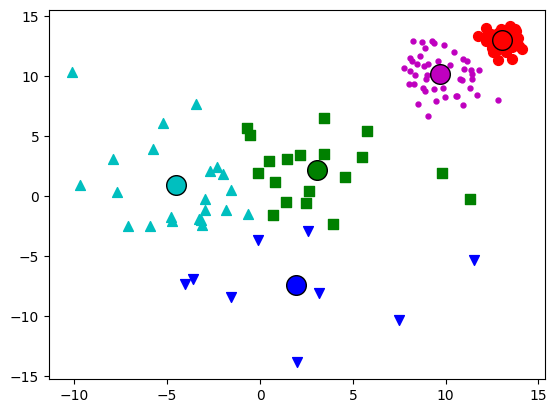

In [54]:
centers = model.cluster_centers_
colors = ['r','g','b','c','m']
markers = ['o','s','v','^','.']

for i,c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i,0],
                y=data[model.labels_==i,1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i],
                edgecolor='k')

plt.show()

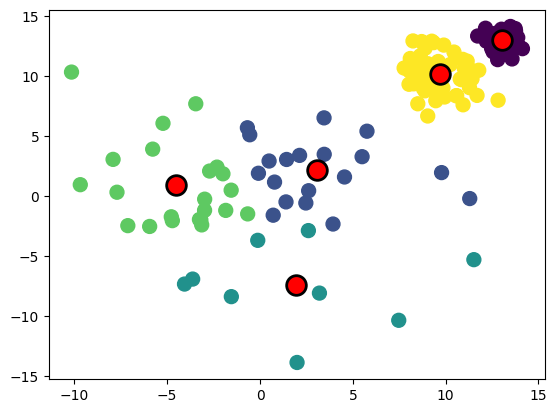

In [55]:
pred = model.predict(data[:,0:2])
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='r', edgecolor='k', linewidth=2)
plt.show()

## 비 구형인 경우

In [56]:
np.random.seed(0)
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise

X2 = X1 +1.5
Y2 = np.cos(X2)+ noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

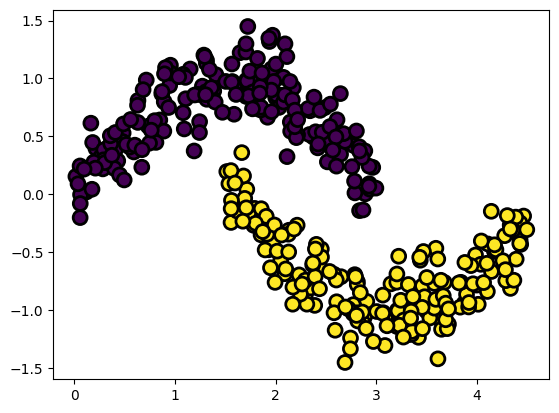

In [57]:
plt.scatter(x=data[:,0], y=data[:,1],
            marker='o', c=data[:,2].astype(int),
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [58]:
model = KMeans(n_clusters=2, init="random", n_init=10)
model.fit(data[:,0:2])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",2
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


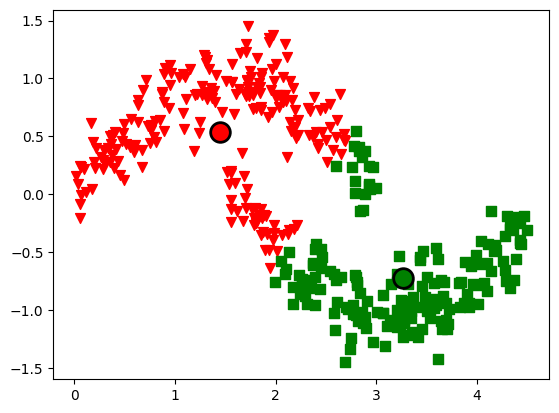

In [59]:
c0, c1 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.show()

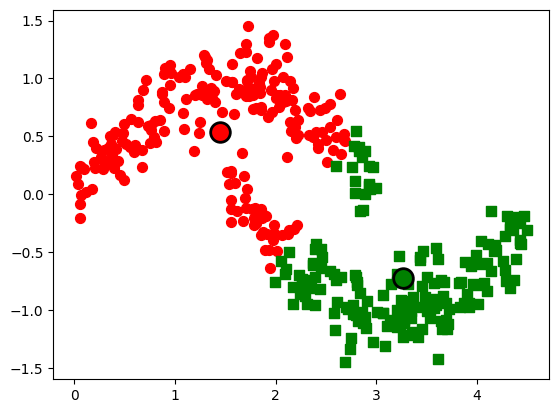

In [60]:
# 반복문 이용하기
centers = model.cluster_centers_
for i,c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i,0],
                y=data[model.labels_==i,1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i],
                edgecolor='k', linewidth=2)

plt.show()

In [61]:
model = KMeans(n_clusters=7, init="random", 
               random_state=2, n_init=10)
model.fit(data[:,0:2])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",7
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",2
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


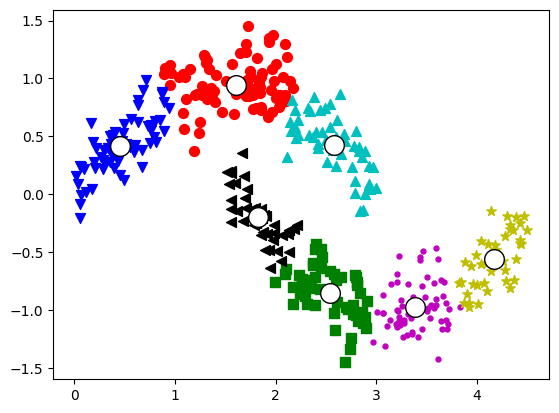

In [62]:
centers = model.cluster_centers_
colors = ['r','g','b','c','m','k',"y"]
markers = ['o','s','v','^','.','<',"*"]
for i,c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i,0],
                y=data[model.labels_==i,1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c='w',
                edgecolor='k')

plt.show()

In [63]:
import os
os.environ["OMP_NUM_THREADS"] = '2'

from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, n_init=10,
                   random_state=2)
    cluster_labels = model.fit_predict(data[:, :-1])
    score = silhouette_score(data[:, :-1], 
                             cluster_labels)
    print(f"클러스터 수: {n_clusters}, 실루엣 계수: {score}")

클러스터 수: 2, 실루엣 계수: 0.5325990529856304
클러스터 수: 3, 실루엣 계수: 0.4701230677079941
클러스터 수: 4, 실루엣 계수: 0.4732502498237369
클러스터 수: 5, 실루엣 계수: 0.45536154807166723
클러스터 수: 6, 실루엣 계수: 0.49827710223249594
클러스터 수: 7, 실루엣 계수: 0.5038738136688508
클러스터 수: 8, 실루엣 계수: 0.4918697936848558
클러스터 수: 9, 실루엣 계수: 0.4727488547651083
클러스터 수: 10, 실루엣 계수: 0.46412230942940064
